In [86]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [68]:
%matplotlib notebook

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

import ipywidgets as widgets
from IPython import display

# Scatter

In [58]:
def plot_scatter(folder):
    
    if(folder=="1_298"): label="System~1"
    elif(folder=="1_673"): label="System~2"
    elif(folder=="75_673"): label="System~3"
    elif(folder=="35_673"): label="System~4"
    
    OW = np.loadtxt(f'{folder}/Coordinates/OW.txt', dtype= 'float')

    x1 = OW[:,0]
    y1 = OW[:,1]
    z1 = OW[:,2]

    fig1 = plt.figure(figsize=(5,5),dpi=100)
    axes1 = fig1.add_axes([0.1,0.1,0.9,0.9],projection='3d')

    axes1.scatter3D(x1,y1,z1,
                    #c=z1,
                    #cmap='Blues',
                    s = 50,
                    label = f'${label}$',
                    color = 'blue',
                    edgecolor = 'k'
                   )

    #axes1.view_init(elev=0, azim=0)
    
    axes1.grid(False)
    axes1.set_xticks([])
    axes1.set_yticks([])
    axes1.set_zticks([])
#     axes1.axis('off')
#     axes1.grid(b=None)

    axes1.legend()

    #plt.savefig('H2Osys.eps',format='eps',bbox_inches='tight')

    
    
    
    
    
    
system_dropdown = widgets.Dropdown(options=["1_298","1_673","75_673","35_673"], description="system:")
# display.display(system)




gui = widgets.interactive(plot_scatter,  folder=system_dropdown)
display.display(gui)

interactive(children=(Dropdown(description='system:', options=('1_298', '1_673', '75_673', '35_673'), value='1…

# Vectors

In [217]:
# HB lenghts seem dicey

In [83]:
system_name = "35_673"

In [84]:
numW = 512
e = np.genfromtxt(f'{system_name}/Water/Edges.csv', delimiter=',',dtype=int)
n = [i for i in range(0,numW)]
G = nx.Graph()
G.add_nodes_from(n, nodetype=int)
G.add_edges_from(e, nodetype=int)

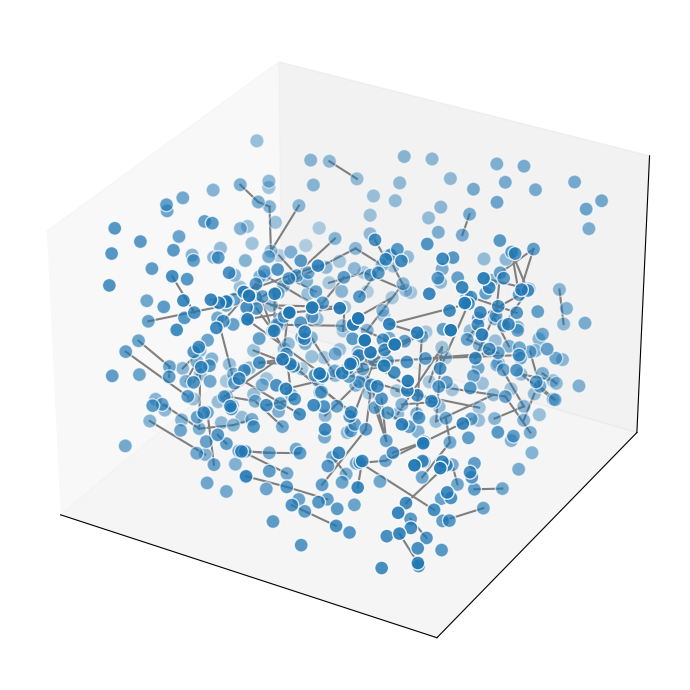

In [216]:
OW = np.loadtxt(f"{system_name}/Coordinates/OW.txt")

post = dict(enumerate(OW))

node_xyz = np.array([post[v] for v in sorted(G)])
edge_xyz = np.array([(post[u], post[v]) for u, v in G.edges()])

# Create the 3D figure
fig9 = plt.figure(figsize=(7,7))
ax9 = fig9.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax9.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    temp = np.sqrt(np.sum(np.square(vizedge[1]-vizedge[0])))
    if(temp<1):ax9.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax9):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax9.grid(False)
    # Suppress tick labels
    for dim in (ax9.xaxis, ax9.yaxis, ax9.zaxis):
        dim.set_ticks([])
    # Set axes labels
#     ax9.set_xlabel("x")
#     ax9.set_ylabel("y")
#     ax9.set_zlabel("z")


_format_axes(ax9)
fig9.tight_layout()
plt.show()

## Approach 2

In [214]:
# generate HBvectors data

In [ ]:
data_o2o = np.loadtxt('HBvectorsO2O.txt', dtype = 'float', delimiter = ',',unpack=False)

In [ ]:
a1 = data_o2o[:,0]
b1 = data_o2o[:,1]
c1 = data_o2o[:,2]
d1 = data_o2o[:,3]
e1 = data_o2o[:,4]
f1 = data_o2o[:,5]

fig_o2o = plt.figure(figsize=(9,9),dpi=100)

axes_o2o = fig_o2o.add_axes([0.1,0.1,0.9,0.9],projection='3d')

axes_o2o.quiver(a1,b1,c1,d1,e1,f1, 
                label = r'$H_2O-H_2O$',
                color = 'blue',
                arrow_length_ratio=0.4
               )

axes_o2o.scatter3D(x1,y1,z1,
                #c=z1,
                #cmap='Blues',
                s = 50,
                label = r'$H_2O$',
                #color = 'blue'
               )

## Approach 3

In [213]:
# Add the pbc function

In [201]:
for i,j in ed:
    print(np.linalg.norm(OW[j]-OW[i]))

0.6779476380960406
3.156575517867425
0.7427859718653822
0.26489809361337435
3.3726918032930313
2.3495859209656498
0.46926005583258423
0.3022135006911503
0.5611301096893659
0.515628742410661
2.6649272035085687
1.2564851769917542
0.9329576624906407
0.8102351510518414
3.33787087826956
2.973012108956168
3.6905536170065325
1.0378867953683582
3.0381301815425883
0.3667328728107149
3.2360052533949943
0.5225332525304013
1.0822800007391802
3.391746157954631
4.415918251054926
0.9370533602735758
0.7693458260106438
0.4081531575279063
0.5934045837369307
0.6667795737723224
3.174594777290481
3.171155940662647
0.6785440295220347
0.25872958856690526
0.6668777999004013
2.9236899630432776
3.2164707366926257
1.30687107244747
0.6005347616916109
0.36175406010161093
0.4468310642737364
0.5678564959565049
3.25562190679446
0.7164370174690866
0.9571259060332657
0.9279019344736815
0.7055380925222959
3.644536047290519
1.0040064740827122
0.7957097460757911
1.042696983787716
0.6483664087535692
0.8448230583974374
0.45

In [206]:
box_length = 3.52396 

In [207]:
def pbc_issue(alk):
    for i in np.arange(len(alk)):
        for j in range(0,3):
            if(np.absolute(alk[i,j])>1):
                alk[i,j]=box_length-np.absolute(alk[i,j])

In [210]:
ed = np.array(G.edges)
v1 = np.empty((0,3))
v2 = np.empty((0,3))

for i,j in ed:
    v1 = np.vstack((v1,OW[i]))
    v2 = np.vstack((v2,OW[j]-OW[i]))   

# pbc_issue(v2)

v3 = np.hstack((v1,v2))

a1 = v3[:,0]
b1 = v3[:,1]
c1 = v3[:,2]
d1 = v3[:,3]
e1 = v3[:,4]
f1 = v3[:,5]

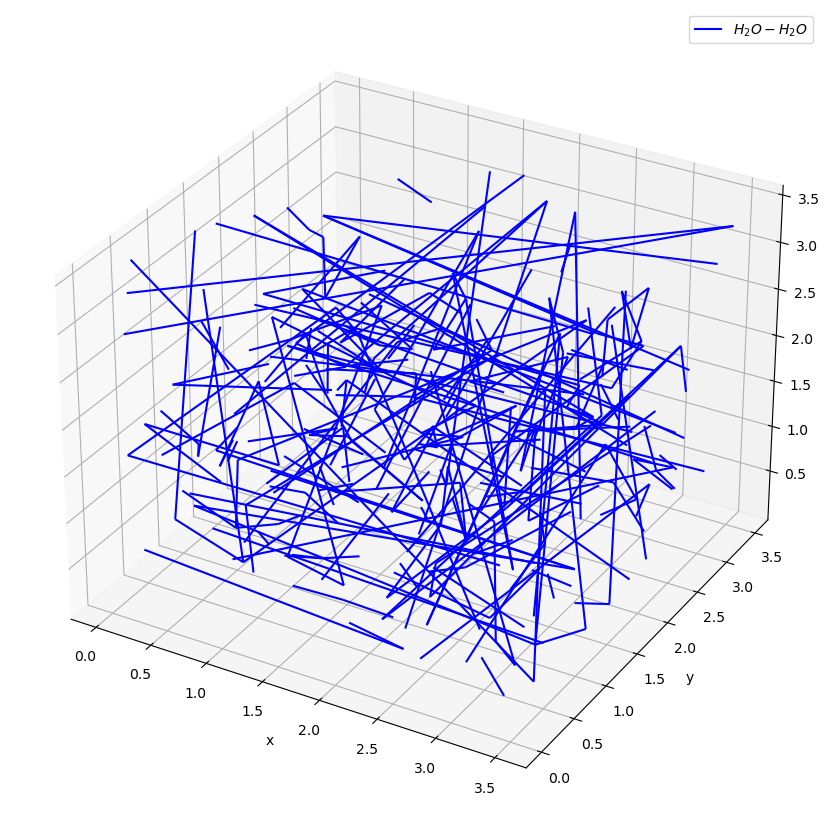

In [212]:
fig_o2o = plt.figure(figsize=(9,9),dpi=100)

axes_o2o = fig_o2o.add_axes([0.1,0.1,0.9,0.9],projection='3d')

axes_o2o.quiver(a1,b1,c1,d1,e1,f1, 
                label = r'$H_2O-H_2O$',
                color = 'blue',
                arrow_length_ratio=0,
                #lw = 1.5
               )

#axes_o2o.set_xlim3d([0, 1])
#axes_o2o.set_ylim3d([0, 1])
#axes_o2o.set_zlim3d([0, 1])

# axes_o2o.view_init(
#                    elev=10, 
#                    azim=0
#                   )

#plt.set_aspect('auto')
#axes_o2o.set_axis_off()

#fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)

plt.xlabel('x')
plt.ylabel('y')

axes_o2o.legend()

## Largest cluster in red

In [ ]:
conc = 20

nodes = np.loadtxt(f'../../Li{conc}mResults/SysInfo.txt')[1].astype(int)
nodes = [i for i in range(0,nodes)]
edges = np.genfromtxt(f'../../Li{conc}mResults/Water/Edges.csv', delimiter=',',dtype=int)
G = nx.Graph()
G.add_nodes_from(nodes, nodetype = int)
G.add_edges_from(edges, edgetype = int)

OW = np.loadtxt(f"../../Li{conc}mResults/Coordinates/OW.txt")

components = nx.connected_components(G)
largest_component = max(components, key=len)
LCC = G.subgraph(largest_component)

indices = np.array(LCC.nodes)

lcc_coods = np.array([])
for i in list(LCC):
    lcc_coods = np.append(lcc_coods,OW[i])

lcc_coods = lcc_coods.reshape(-1,3)

# OW = np.loadtxt("../../Li20mResults/Coordinates/OW.txt")

post = dict(enumerate(OW))

# The graph to visualize
# G = nx.cycle_graph(20)

# 3d spring layout
# pos = nx.spring_layout(G, dim=3, seed=779)


# a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# index = [2, 3, 6]

OW = np.delete(OW, indices,axis=0)


# Extract node and edge positions from the layout
# node_xyz = np.array([post[v] for v in sorted(G)])
edge_xyz = np.array([(post[u], post[v]) for u, v in G.edges()])



# Create the 3D figure
fig9 = plt.figure(figsize=(10,10))
ax9 = fig9.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax9.scatter(*OW.T, s=100, ec="w")

ax9.scatter(*lcc_coods.T, s=100, ec="red")


# Plot the edges
for vizedge in edge_xyz:
    temp = np.sqrt(np.sum(np.square(vizedge[1]-vizedge[0])))
    if(temp<1):ax9.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax9):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax9.grid(False)
    # Suppress tick labels
    for dim in (ax9.xaxis, ax9.yaxis, ax9.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax9.set_xlabel("x")
    ax9.set_ylabel("y")
    ax9.set_zlabel("z")


_format_axes(ax9)
fig9.tight_layout()
plt.show()